# Investigate Business Hotel using Data Visualization

- hotel : The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel
- is_canceled : Value indicating if the booking was canceled (1) or not (0)
- lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year : Year of arrival date
- arrival_date_month : Month of arrival date with 12 categories: “January” to “December”
- arrival_date_week_number : Week number of the arrival date
- arrival_date_day_of_month : Day of the month of the arrival date
- stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_weekdays_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights
- adults : Number of adults
- children : Number of children
- babies : Number of babies
- meal : Type of meal booked. Categories are presented in standard hospitality meal packages:
    - Undefined/SC – no meal package
    - BB : Bed & Breakfast
    - HB : Half board (breakfast and one other meal – usually dinner)
    - FB : Full board (breakfast, lunch and dinner)
- city : City of origin
- market_segment : Market segment designation. In categories, the term
    - “TA” means “Travel Agents” and
    - “TO” means “Tour Operators”
- distribution_channel : Booking distribution channel. The term
    - “TA” means “Travel Agents” and
    - “TO” means “Tour Operators”
- is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
- booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    - No Deposit : no deposit was made
    - Non Refund : a deposit was made in the value of the total stay cost
    - Refundable : a deposit was made with a value under the total cost of stay
- agent : ID of the travel agency that made the booking
- company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type : Type of booking, assuming one of four categories:
    - Contract : when the booking has an allotment or other type of contract associated to it
    - Group : when the booking is associated to a group
    - Transient : when the booking is not part of a group or contract, and is not associated to other transient booking
    - Transient-party : when the booking is transient, but is associated to at least other transient booking
- adr : Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
- required_car_parking_spaces : Number of car parking spaces required by the customer
- total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status : Reservation last status, assuming one of three categories:
    - Canceled : booking was canceled by the customer
    - Check-Out : customer has checked in but already departed
    - No-Show : customer did not check-in and did inform the hotel of the reason why

In [73]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
# show all columns
pd.set_option('display.max_columns', None)

In [75]:
# load dataset
df = pd.read_csv(r'D:\Rakamin Data Science\Job Acceleration Program\Mini Project 2 - Investigate Business Hotel\hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## EDA

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [77]:
# cek data duplikat
df.duplicated().sum()

33261

In [78]:
# cek missing value
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_weekdays_nights,0,0.000000
adults,0,0.000000


In [79]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [80]:
# split kolom categorical and numeric
cat_colm = df.select_dtypes(include='object').columns
num_colm = df.select_dtypes(exclude='object').columns

In [81]:
# check unique values
for col in cat_colm:
    print(f'unique value on column {col}: {df[col].unique()}')
    print('\n')

unique value on column hotel: ['Resort Hotel' 'City Hotel']


unique value on column arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']


unique value on column meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']


unique value on column city: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' nan 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi' 'Kota Jakarta Barat'
 'Kota Bengkulu' 'Kabupaten Bandung Barat' 'Kabupaten Bekasi'
 'Kabupaten Bogor' 'Kabupaten Ciamis' 'Kabupaten Cianjur'
 'Kabupaten Cirebon' 'Kota Cimahi' 'Kabupaten Indramayu'
 'Kabu

- Ada 4 kolom yang memiliki missing value, yaitu `children`, `city`, `agent`, dan `company`.
- Value "Undefined" pada kolom `meal` akan diganti "No Meal".
- Terdapat nilai negatif di kolom `adr`.

## Data Pre-processing

In [181]:
df_pre = df.copy()

In [182]:
# remove duplicated data
df_pre.drop_duplicates(keep='first',inplace=True)

print('Jumlah baris dan kolom sebelum remove duplicated data :', df.shape)
print('Jumlah baris dan kolom setelah remove duplicated data :', df_pre.shape)

Jumlah baris dan kolom sebelum remove duplicated data : (119390, 30)
Jumlah baris dan kolom setelah remove duplicated data : (86130, 30)


In [183]:
# handling missing value

# kolom agent diisi median
df_pre['agent'] = df_pre['agent'].fillna(df_pre['agent'].median())

# kolom company didrop
df_pre.drop('company', axis=1, inplace=True)

# hapus missing value pada kolom city dan children
df_pre = df_pre.dropna(subset=['city'])
df_pre = df_pre.dropna(subset=['children'])

In [184]:
df_pre.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,4.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,4.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,4.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,2.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,1.0


In [185]:
df_pre.shape

(85676, 29)

In [186]:
# replace Undefined values with No Meal
df_pre['meal'].replace('Undefined', 'No Meal', inplace=True)
df_pre['meal'].value_counts()

Breakfast     66675
No Meal        9885
Dinner         8769
Full Board      347
Name: meal, dtype: int64

In [187]:
# ubah negative value di kolom adr menjadi 0
df_pre['adr'] = df_pre['adr'].apply(lambda x: 0 if x < 0 else x) 

- Kolom `agent` diisi median karena data memiliki distribusi skewed.
- Kolom `company` didrop karena memiliki missing value yang sangat besar.
- Missing value pada kolom `children` dan `city` dapat didrop karena persentasenya sangat kecil.

### Feature Extraction

In [188]:
# buat kolom total_guests
df_pre['total_guests'] = df_pre['adults'] + df_pre['children'] + df_pre['babies']
df_pre['total_guests'] = df_pre['total_guests'].astype('int64')

# buat kolom durasi
df_pre['stay_duration'] = df_pre['stays_in_weekend_nights'] + df_pre['stays_in_weekdays_nights']

In [332]:
df_pre.shape

(85676, 31)

In [333]:
# remove data total guest = 0 dan durasi = 0
df_new = df_pre[(df_pre['total_guests'] > 0) & (df_pre['stay_duration'] > 0)]

In [334]:
df_new.shape

(84935, 31)

## Visualization

### Monthly Hotel Booking Analysis Based on Hotel Type

In [233]:
df_monthly_booking = df_new.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_monthly_booking.columns = ['hotel', 'arrival_month', 'unique_year', 'total_booking']

df_monthly_booking['avg_booking'] = round(df_monthly_booking['total_booking'] / df_monthly_booking['unique_year'])
df_monthly_booking

,hotel,arrival_month,unique_year,total_booking,avg_booking
0,City Hotel,April,2,3514,1757.0
1,City Hotel,August,2,4908,2454.0
2,City Hotel,December,2,4008,2004.0
3,City Hotel,February,2,2952,1476.0
4,City Hotel,January,2,2847,1424.0
5,City Hotel,July,2,5321,2660.0
6,City Hotel,June,2,5017,2508.0
7,City Hotel,March,2,2674,1337.0
8,City Hotel,May,2,4777,2388.0
9,City Hotel,November,2,4040,2020.0


In [234]:
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_monthly_booking['month'] = pd.Categorical(df_monthly_booking['arrival_month'], categories=ordered_month)
df_monthly_booking.sample(3)

,hotel,arrival_month,unique_year,total_booking,avg_booking,month
4,City Hotel,January,2,2847,1424.0,January
3,City Hotel,February,2,2952,1476.0,February
10,City Hotel,October,3,6469,2156.0,October


Text(4.8, 3700, 'Peak Season')

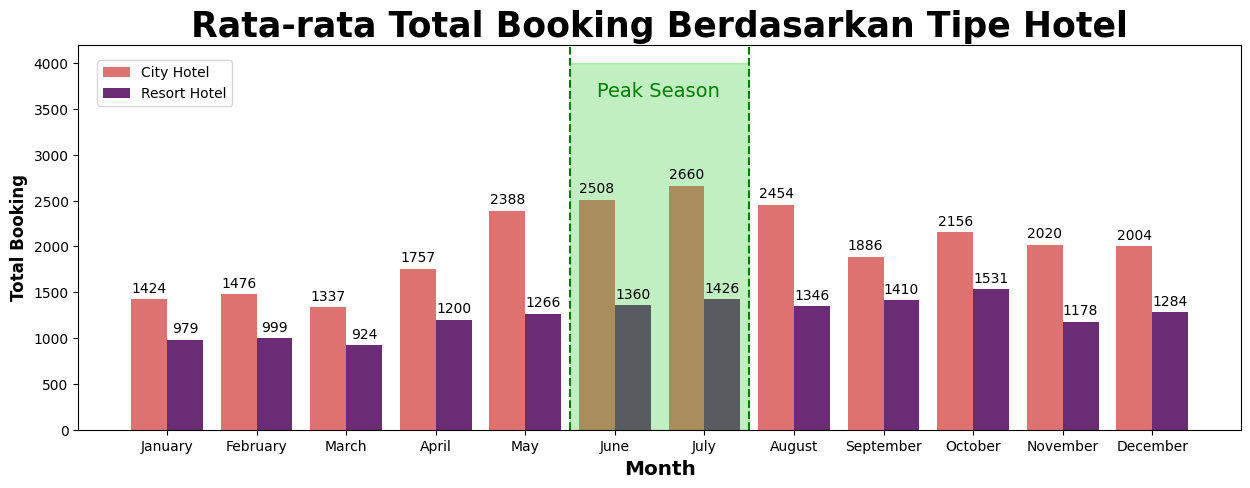

In [320]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='month', y='avg_booking', data=df_monthly_booking, hue='hotel', ax=ax, palette='magma_r')

# legend position
ax.legend(loc='center left', bbox_to_anchor=(0.01,0.9))

# buat annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext = (0, 8), textcoords = 'offset points')
    
plt.title('Rata-rata Total Booking Berdasarkan Tipe Hotel', fontsize=25, fontweight='bold')
plt.xlabel('Month', fontsize='x-large',fontweight='bold')
plt.ylabel('Total Booking', fontsize='large',fontweight='bold')

plt.axvline(4.5, ls='--', color='green')
plt.axvline(6.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,7.5), [[4000]], color='limegreen', alpha=0.3)
plt.text(x=4.8, y=3700, s='Peak Season', fontsize=14, color='green', va='center')

Berdasarkan grafik di atas, dapat dilihat bahwa:
- Pada peak season, pengunjung lebih banyak memilih untuk menginap di city hotel.
- Tipe city hotel memiliki rata-rata booking tertinggi pada bulan Juli. Kedua tertinggi pada bulan Juni. Hal ini bisa disebabkan karena bulan Juni dan Juli bertepatan dengan musim liburan sekolah (peak season).
- Tipe resort hotel memiliki rata-rata booking tertinggi pada bulan Oktober.

### Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [335]:
df_week = df_new.copy()

In [336]:
# buat kolom weeks
def week(x):
    if x['stay_duration'] > 28:
        week = '>4 weeks'
    elif x['stay_duration'] > 21:
        week = '4 weeks'
    elif x['stay_duration'] > 14:
        week = '3 weeks'
    elif x['stay_duration'] > 7:
        week = '2 weeks'
    else:
        week = '1 week'
    return week

df_week['weeks'] = df_week.apply(lambda x: week(x), axis=1)
df_week.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month,total_guests,stay_duration,weeks
39824,Resort Hotel,0,21,2019,October,34,25,2,2,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,224.0,0,2,Check-Out,NaN,2,4,1 week
77125,City Hotel,0,188,2017,November,37,6,2,0,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,102.5,1,1,Check-Out,NaN,2,2,1 week
96898,City Hotel,0,3,2019,October,33,14,1,0,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Direct,1,0,5,1,No Deposit,14.0,0,Personal,95.0,1,2,Check-Out,NaN,1,1,1 week


In [338]:
df_week['total_cancel'] = df_week['is_canceled'].apply(lambda x: 1 if x == 1 else 0)
df_week['total_check_in'] = df_week['is_canceled'].apply(lambda x: 1 if x == 0 else 0)

df_week.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month,total_guests,stay_duration,weeks,total_cancel,total_check_in
42168,City Hotel,0,12,2017,November,36,1,0,3,2,1.0,0,Breakfast,Kota Batu,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,13.0,0,Contract,98.50,0,1,Check-Out,NaN,3,3,1 week,0,1
55034,City Hotel,1,126,2018,October,32,3,0,3,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,22.0,0,Personal,72.25,0,0,Canceled,NaN,2,3,1 week,1,0
67088,City Hotel,1,270,2019,June,17,28,1,2,2,0.0,0,No Meal,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,99.00,0,0,Canceled,NaN,2,3,1 week,1,0


In [341]:
df_week = df_week.groupby(['hotel', 'weeks']).agg({'total_cancel':'sum', 'total_check_in':'sum'}).reset_index()
df_week

,hotel,weeks,total_cancel,total_check_in
0,City Hotel,1 week,15187,35843
1,City Hotel,2 weeks,523,486
2,City Hotel,3 weeks,73,27
3,City Hotel,4 weeks,21,4
4,City Hotel,>4 weeks,18,2
5,Resort Hotel,1 week,6832,22275
6,Resort Hotel,2 weeks,938,2495
7,Resort Hotel,3 weeks,47,86
8,Resort Hotel,4 weeks,20,36
9,Resort Hotel,>4 weeks,6,16


In [343]:
df_week['total_booking'] = df_week['total_cancel'] + df_week['total_check_in']
df_week['cancel_rate'] = round(df_week['total_cancel'] / df_week['total_booking'] * 100, 2)
df_week

,hotel,weeks,total_cancel,total_check_in,total_booking,cancel_rate
0,City Hotel,1 week,15187,35843,51030,29.76
1,City Hotel,2 weeks,523,486,1009,51.83
2,City Hotel,3 weeks,73,27,100,73.00
3,City Hotel,4 weeks,21,4,25,84.00
4,City Hotel,>4 weeks,18,2,20,90.00
5,Resort Hotel,1 week,6832,22275,29107,23.47
6,Resort Hotel,2 weeks,938,2495,3433,27.32
7,Resort Hotel,3 weeks,47,86,133,35.34
8,Resort Hotel,4 weeks,20,36,56,35.71
9,Resort Hotel,>4 weeks,6,16,22,27.27


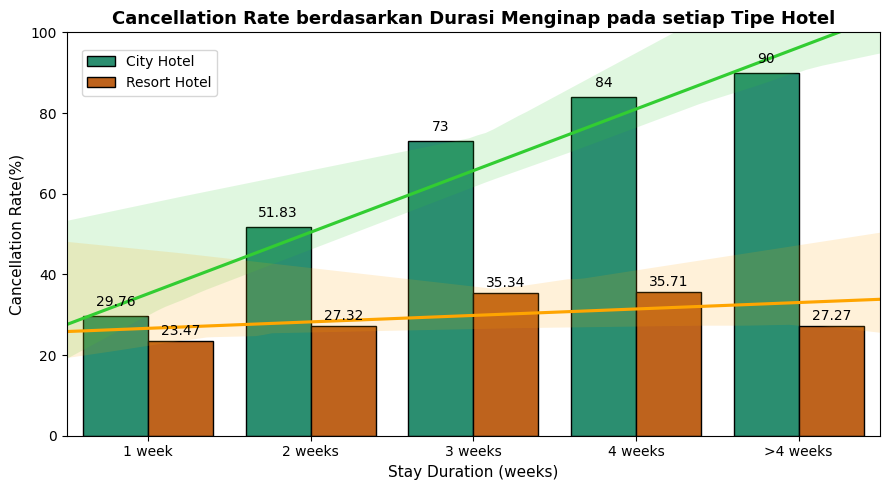

In [393]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Cancellation Rate berdasarkan Durasi Menginap pada setiap Tipe Hotel", fontsize=13, color='black', weight='bold')
sns.barplot(x='weeks', y='cancel_rate', data=df_week, hue='hotel', edgecolor='black', palette='Dark2')

ax.legend(loc='center left', bbox_to_anchor=(0.01,0.9))
sns.regplot(x=np.arange(0, len(df_week[df_week['hotel'] == 'City Hotel'])), y='cancel_rate',
            data=df_week[df_week['hotel'] == 'City Hotel'], scatter=False, color='limegreen', truncate=False)
sns.regplot(x=np.arange(0, len(df_week[df_week['hotel'] == 'Resort Hotel'])), y='cancel_rate',
            data=df_week[df_week['hotel'] == 'Resort Hotel'], scatter=False, color='orange', truncate=False)

plt.xlabel('Stay Duration (weeks)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

plt.tight_layout()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
- Semakin lama durasi menginapnya, maka semakin besar pula cancellation rate-nya.
- Cancellation rate tertinggi tipe city hotel terjadi pada durasi menginap lebih dari 4 minggu.
- Cancellation rate tertinggi tipe resort hotel terjadi pada durasi menginap 4 minggu.

### Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [440]:
df_lead = df_new.copy()

In [441]:
# buat kolom lead time group
lead_time_list=[]
for i in df_lead['lead_time']:
    if i <= 30:
        lead_time_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_time_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_time_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_time_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_time_group = '11-12 Months'
    else: 
        lead_time_group = '>12 Months'
    lead_time_list.append(lead_time_group)
df_lead['lead_time_group'] = lead_time_list

In [442]:
df_lead['lead_time_group'].value_counts()

1 Month         33437
2-4 Months      29336
5-7 Months      14464
8-10 Months      5525
11-12 Months     1197
>12 Months        976
Name: lead_time_group, dtype: int64

In [443]:
df_lead['total_cancel'] = df_lead['is_canceled'].apply(lambda x: 1 if x == 1 else 0)
df_lead['total_check_in'] = df_lead['is_canceled'].apply(lambda x: 1 if x == 0 else 0)

df_lead.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month,total_guests,stay_duration,lead_time_group,total_cancel,total_check_in
116653,City Hotel,0,167,2019,September,29,20,0,3,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,114.9,0,2,Check-Out,NaN,2,3,5-7 Months,0,1
114555,City Hotel,0,156,2019,August,25,20,0,4,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0,Personal,163.8,0,0,Check-Out,NaN,3,4,5-7 Months,0,1
40828,City Hotel,0,0,2017,October,32,8,1,1,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,14.0,0,Personal,100.0,0,0,Check-Out,NaN,2,2,1 Month,0,1


In [444]:
df_lead = df_lead.groupby(['hotel', 'lead_time_group']).agg({'total_cancel':'sum', 'total_check_in':'sum'}).reset_index()
df_lead

,hotel,lead_time_group,total_cancel,total_check_in
0,City Hotel,1 Month,3923,16022
1,City Hotel,11-12 Months,312,205
2,City Hotel,2-4 Months,6656,12918
3,City Hotel,5-7 Months,3318,5402
4,City Hotel,8-10 Months,1309,1561
5,City Hotel,>12 Months,304,254
6,Resort Hotel,1 Month,1671,11821
7,Resort Hotel,11-12 Months,288,392
8,Resort Hotel,2-4 Months,3013,6749
9,Resort Hotel,5-7 Months,1850,3894


In [445]:
df_lead['total_booking'] = df_lead['total_cancel'] + df_lead['total_check_in']
df_lead['cancel_rate'] = round(df_lead['total_cancel'] / df_lead['total_booking'] * 100, 2)
df_lead

,hotel,lead_time_group,total_cancel,total_check_in,total_booking,cancel_rate
0,City Hotel,1 Month,3923,16022,19945,19.67
1,City Hotel,11-12 Months,312,205,517,60.35
2,City Hotel,2-4 Months,6656,12918,19574,34.00
3,City Hotel,5-7 Months,3318,5402,8720,38.05
4,City Hotel,8-10 Months,1309,1561,2870,45.61
5,City Hotel,>12 Months,304,254,558,54.48
6,Resort Hotel,1 Month,1671,11821,13492,12.39
7,Resort Hotel,11-12 Months,288,392,680,42.35
8,Resort Hotel,2-4 Months,3013,6749,9762,30.86
9,Resort Hotel,5-7 Months,1850,3894,5744,32.21


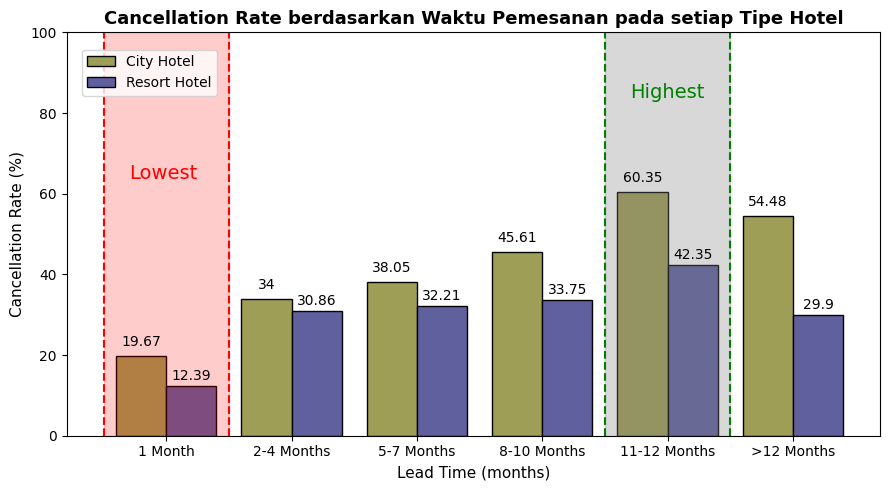

In [483]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Cancellation Rate berdasarkan Waktu Pemesanan pada setiap Tipe Hotel", fontsize=13, color='black', weight='bold')
sns.barplot(x='lead_time_group', y='cancel_rate', data=df_lead, hue='hotel', edgecolor='black', palette='gist_stern_r',
            order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'])

ax.legend(loc='center left', bbox_to_anchor=(0.01,0.9))

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(0.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='red', alpha=0.2)
plt.text(x=-0.3, y=65, s='Lowest', fontsize=14, color='red', va='center')

plt.axvline(3.5, ls='--', color='green')
plt.axvline(4.5, ls='--', color='green')
plt.stackplot(np.arange(3.5,5.5), [[100]], color='grey', alpha=0.3)
plt.text(x=3.7, y=85, s='Highest', fontsize=14, color='green', va='center')

plt.xlabel('Lead Time (months)', fontsize=11)
plt.ylabel('Cancellation Rate (%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

plt.tight_layout()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
- Semakin lama waktu pemesanannya, maka semakin besar pula cancellation rate-nya.
- Cancellation rate tertinggi tipe city hotel dan resort hotel terjadi pada waktu pemesanan 11-12 bulan.
- Cancellation rate tertinggi tipe city hotel dan resort hotel terjadi pada waktu pemesanan 1 bulan.